In [199]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import h5py
import math
%matplotlib inline

In [200]:
train_dataset = h5py.File('/cxldata/datasets/project/cat-non-cat/train_catvnoncat.h5',"r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:])
train_set_y_orig = np.array(train_dataset["train_set_y"][:])

In [201]:
test_dataset = h5py.File('/cxldata/datasets/project/cat-non-cat/test_catvnoncat.h5',"r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:])
test_set_y_orig = np.array(test_dataset["test_set_y"][:])

In [202]:
classes = np.array(test_dataset["list_classes"][:])
classes

array([b'non-cat', b'cat'], dtype='|S7')

In [203]:
train_set_y = train_set_y_orig.reshape((1,train_set_y_orig.shape[0]))
test_set_y = test_set_y_orig.reshape((1,test_set_y_orig.shape[0]))
train_set_x = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
classes_n = classes.reshape(classes.shape[0],-1).shape[0]
#class_n= int(''.join(map(str, classes_n)))
classes_n

2

[1]
cat


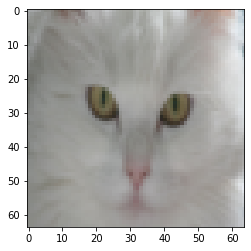

In [204]:
index=50
plt.imshow(train_set_x_orig[index])
y= train_set_y[:,index]
y_class = classes[np.squeeze(y)].decode("utf-8")
print(y)
print(y_class)

In [205]:
print(train_set_x_orig.shape)
print(test_set_x_orig.shape)
print(train_set_x.shape)
print(test_set_x.shape)

(209, 64, 64, 3)
(50, 64, 64, 3)
(12288, 209)
(12288, 50)


In [206]:
import tensorflow as tf
from tensorflow import keras

In [207]:
#Explore the dataset
train_x_shape = train_set_x_orig.reshape(-1,64,64,3)
train_y_shape = train_set_y_orig
test_x_shape = test_set_x_orig.reshape(-1,64,64,3)
test_y_shape = test_set_y_orig
train_x_px = train_set_x_orig[1].shape
print(str(train_x_px))
print(str(train_set_x_orig.shape))
print(str(test_set_x_orig.shape))
print(str(train_set_y.shape))
print(str(test_set_y.shape))
print(str(train_set_x.shape))
print(str(test_set_x.shape))

(64, 64, 3)
(209, 64, 64, 3)
(50, 64, 64, 3)
(1, 209)
(1, 50)
(12288, 209)
(12288, 50)


In [208]:
test_y_shape.shape

(50,)

In [209]:
#standardize the data to have featuree values between 0 and 
train_set_x_stand = train_set_x/255
test_set_x_stand = test_set_x/255
print(train_set_x_stand.shape)
print(test_set_x_stand.shape)

(12288, 209)
(12288, 50)


In [210]:
num_px = train_set_x_orig.shape[1]
num_px

64

In [211]:
X= train_set_x_orig
IMAGE_SIZE = num_px
IMAGE_CHANNELS = 3
NUM_CLASSES = classes_n
BATCH_SIZE =260
k = int(math.ceil(IMAGE_SIZE / 2.0 / 2.0 / 2.0 / 2.0))
n_input = IMAGE_SIZE * IMAGE_SIZE * IMAGE_CHANNELS
conv1_fmaps = 32
conv1_stride = 1
conv1_pad = "SAME"
conv2_fmaps = 64
conv2_stride = 2
conv2_pad = "SAME"
pool3_fmaps = conv2_fmaps
n_fc1 = 64
n_outputs = 1
k


4

In [212]:
tf.reset_default_graph()
conv1 = layers.Conv2D(filters=32, kernel_size=4,strides=2, input_shape =(64,64,3),padding="SAME",activation=tf.nn.relu)

In [213]:
conv2 = layers.Conv2D(filters=64, kernel_size=4,strides=2, padding="SAME",activation=tf.nn.relu)

In [214]:
pool = layers.MaxPooling2D((2,2),strides=2, padding="VALID")

In [215]:
conv3 = layers.Conv2D(filters=128, kernel_size=4,strides=2, padding="SAME",activation=tf.nn.relu)

In [216]:
pool2= layers.MaxPooling2D((2,2),strides=2, padding="VALID")

In [217]:
flatten = layers.Flatten()

In [218]:
dropout = keras.layers.Dropout(0.5)
dropout1 = keras.layers.Dropout(0.5)

In [219]:
dense = layers.Dense(128, activation='relu')

In [220]:
output = layers.Dense(2,activation='softmax')

In [221]:
model = models.Sequential()

In [222]:
model.add(conv1)
model.add(conv2)
model.add(pool)
model.add(dropout)
model.add(conv3)
model.add(pool2)
model.add(dropout1)
model.add(flatten)
model.add(dense)
model.add(output)

In [223]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        1568      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        32832     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         131200    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 2, 128)         0

In [224]:
model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics =["accuracy"])

In [225]:
model.fit(train_x_shape,train_y_shape,epochs=5)

Epoch 1/5
209/209 [==============================] - 0s 1ms/sample - loss: 15.8881 - acc: 0.5981
Epoch 2/5
209/209 [==============================] - 0s 664us/sample - loss: 4.4334 - acc: 0.5981
Epoch 3/5
209/209 [==============================] - 0s 660us/sample - loss: 1.9630 - acc: 0.6124
Epoch 4/5
209/209 [==============================] - 0s 665us/sample - loss: 1.0251 - acc: 0.6268
Epoch 5/5
209/209 [==============================] - 0s 683us/sample - loss: 0.9201 - acc: 0.6172


In [226]:
score = model.evaluate(test_x_shape, test_y_shape)

50/50 [==============================] - 0s 1ms/sample - loss: 0.6088 - acc: 0.6000


In [227]:
prediction = model.predict(test_x_shape)

In [228]:
prediction.shape

(50, 2)

In [237]:
prediction[10]

array([0.4348883 , 0.56511164], dtype=float32)

In [238]:
np.argmax(prediction[10])

1

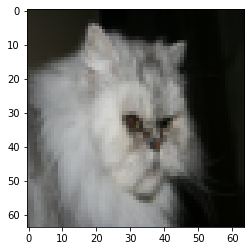

In [239]:
plt.figure()
plt.imshow(np.squeeze(test_x_shape[10]))

In [240]:
prediction[49]

array([0.79813373, 0.20186627], dtype=float32)

In [241]:
np.argmax(prediction[49])

0

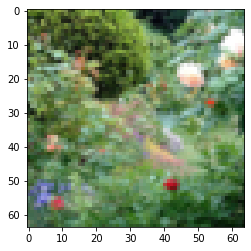

In [242]:
plt.figure()
plt.imshow(np.squeeze(test_x_shape[49]))